# Matplotlib 연습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


## 1) 영화 데이터를 활용하여 x 축은 영화, y축은 평점인 막대 그래프

<BarContainer object of 8 artists>

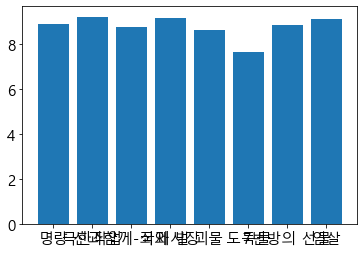

In [4]:
plt.bar(df['영화'], df['평점'])

## 2) 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용

- 제목 : 국내 Top8 영화 평점 정보
- x축label : 영화(90도 회전)
- y축 lable : 평점

Text(0, 0.5, '평점')

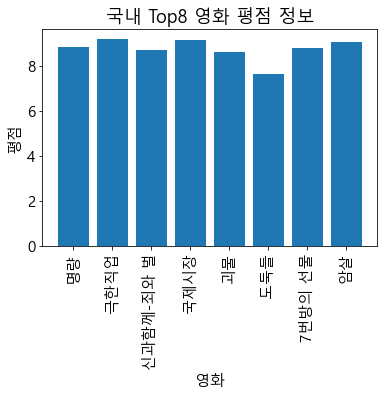

In [7]:
plt.bar(df['영화'], df['평점'])
plt.title('국내 Top8 영화 평점 정보')
plt.xlabel('영화')
plt.xticks(rotation = 90)
plt.ylabel('평점')

## 3) 개봉 연도별 평점 변화 추이를 꺽은선 그래프로 나타내기

In [9]:
df_group = df.groupby('개봉 연도').mean()
df_group

,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


<AxesSubplot:xlabel='개봉 연도'>

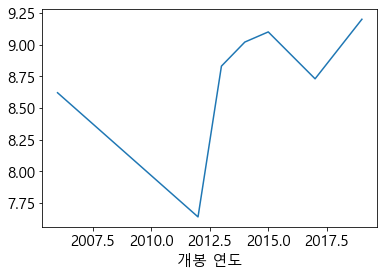

In [13]:
df_group['평점'].plot()
# plt.plot(df_group['개봉연도'], df_group['평점'])

## 4) 앞에 만든 그래프에 제시된 세부 사항 적용

- marker = 'o'
- x축 눈금 : 5년 단위
- y축 범위 : 최소 7, 최대 10

In [19]:
df_group.index

Int64Index([2006, 2012, 2013, 2014, 2015, 2017, 2019], dtype='int64', name='개봉 연도')

(7.0, 10.0)

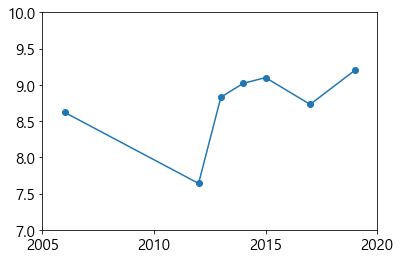

In [23]:
# df_group['평점'].plot(marker='o')
plt.plot(df_group.index, df_group['평점'], marker='o')
plt.xticks([2005, 2010, 2015, 2020])
plt.ylim([7,10])

## 5) 평점이 9점 이상인 영화의 비율을 나타내는 원 그래프
- label : 9점이상/ 9점 미만
- % : 소수점 첫째자리
- 범례 : 그래프 우측에 표시

In [29]:
filt = df['평점'] >= 9
values = [len(df[filt]), len(df[~filt])]
labels = ['9점이상', '9점미만']

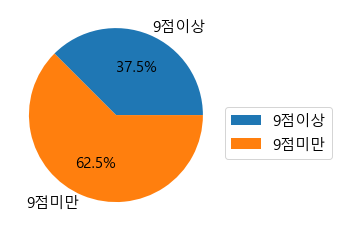

In [33]:
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.legend(loc=(1, 0.3))
plt.show()